In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Preprocessed.csv")

In [3]:
df

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,105.92,32.5,never smoked,1
2,Female,49.0,0,0,171.23,34.4,smokes,1
3,Female,79.0,1,0,174.12,24.0,never smoked,1
4,Male,81.0,0,0,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,191.15,31.1,smokes,0
4978,Female,45.0,1,0,95.02,31.8,smokes,0
4979,Male,40.0,0,0,83.94,30.0,smokes,0


In [4]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
df.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,105.92,32.5,never smoked,1
2,Female,49.0,0,0,171.23,34.4,smokes,1
3,Female,79.0,1,0,174.12,24.0,never smoked,1
4,Male,81.0,0,0,186.21,29.0,formerly smoked,1


In [27]:
df.tail()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,191.15,31.1,smokes,0
4978,Female,45.0,1,0,95.02,31.8,smokes,0
4979,Male,40.0,0,0,83.94,30.0,smokes,0
4980,Female,80.0,1,0,83.75,29.1,never smoked,0


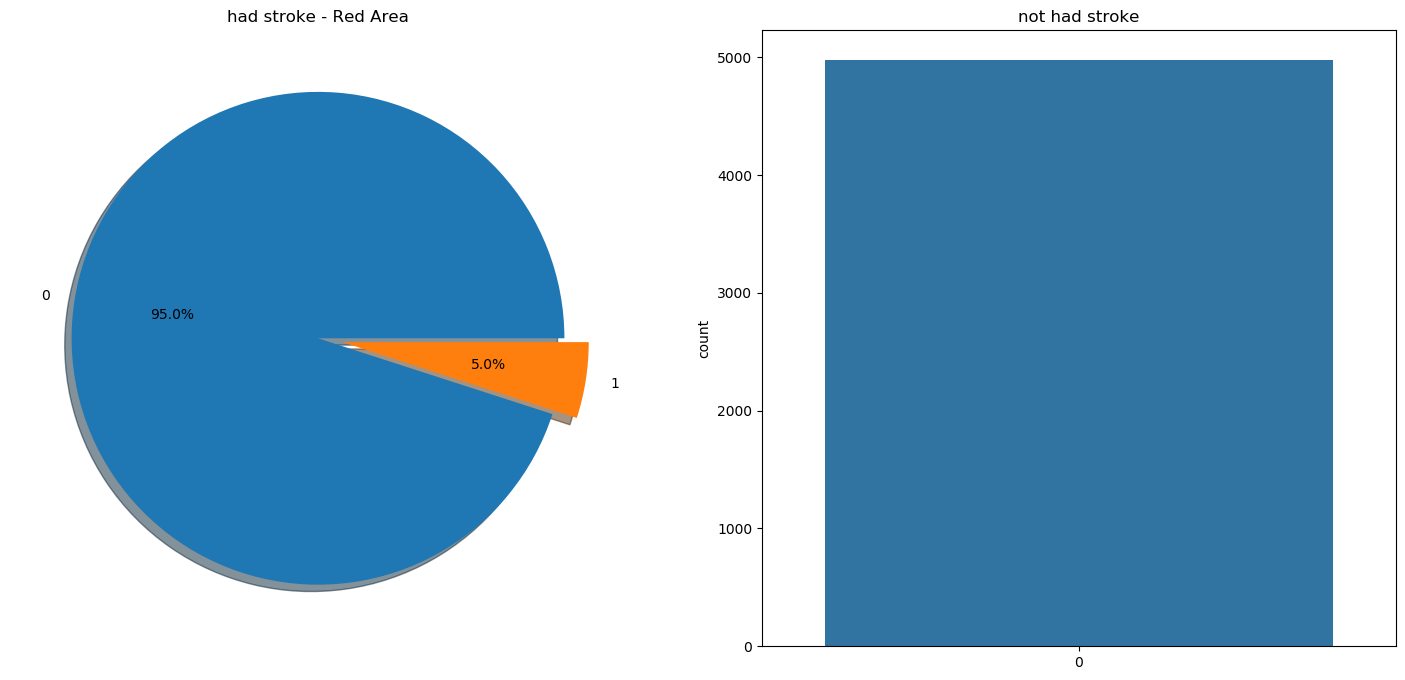

In [26]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['stroke'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('had stroke - Red Area')
ax[0].set_ylabel('')
sns.countplot(df.stroke,ax=ax[1])
ax[1].set_title('not had stroke')
plt.show()

In [7]:
df.groupby(['gender','stroke'])['stroke'].count()

gender  stroke
Female  0         2767
        1          140
Male    0         1966
        1          108
Name: stroke, dtype: int64

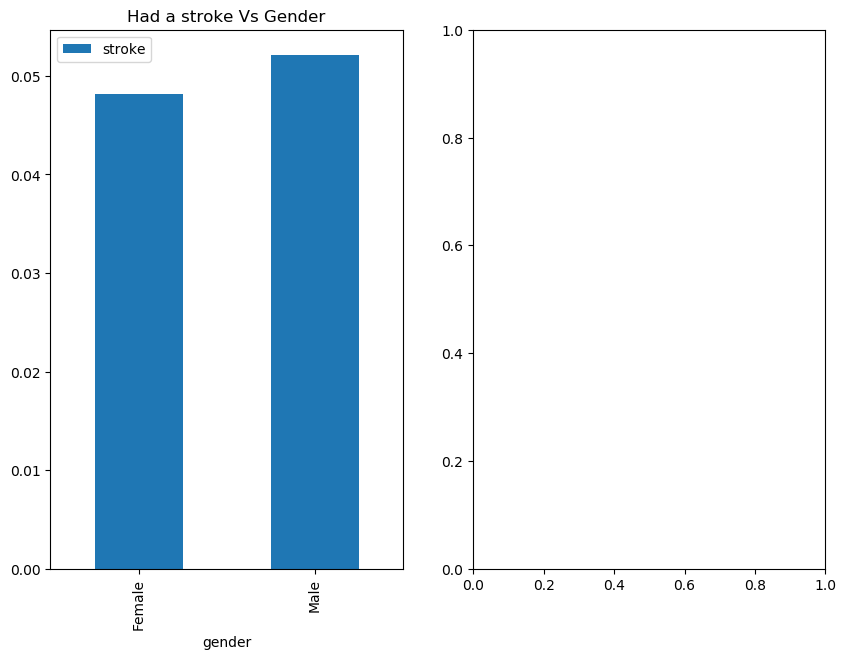

In [32]:
f,ax=plt.subplots(1,2,figsize=(10,7))
df[['gender','stroke']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Had a stroke Vs Gender')
plt.show()

In [34]:
df.groupby(['hypertension','stroke'])['stroke'].count()

hypertension  stroke
0             0         4320
              1          182
1             0          413
              1           66
Name: stroke, dtype: int64

In [35]:
df.groupby(['heart_disease','stroke'])['stroke'].count()

heart_disease  stroke
0              0         4505
               1          201
1              0          228
               1           47
Name: stroke, dtype: int64

In [38]:
pd.crosstab([df.gender,df.stroke],df.smoking_status,margins=True).style.background_gradient(cmap='summer_r')

In [42]:
#!pip install seaborn==0.9.0

  Using cached seaborn-0.9.0-py3-none-any.whl (208 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [47]:
print('Oldest Person was of:',df['age'].max(),'Years')
print('Youngest Person was of:',df['age'].min(),'Years')
print('Average Age in the data:',df['age'].mean(),'Years')

Oldest Person was of: 82.0 Years
Youngest Person was of: 0.08 Years
Average Age in the data: 43.41985946597069 Years


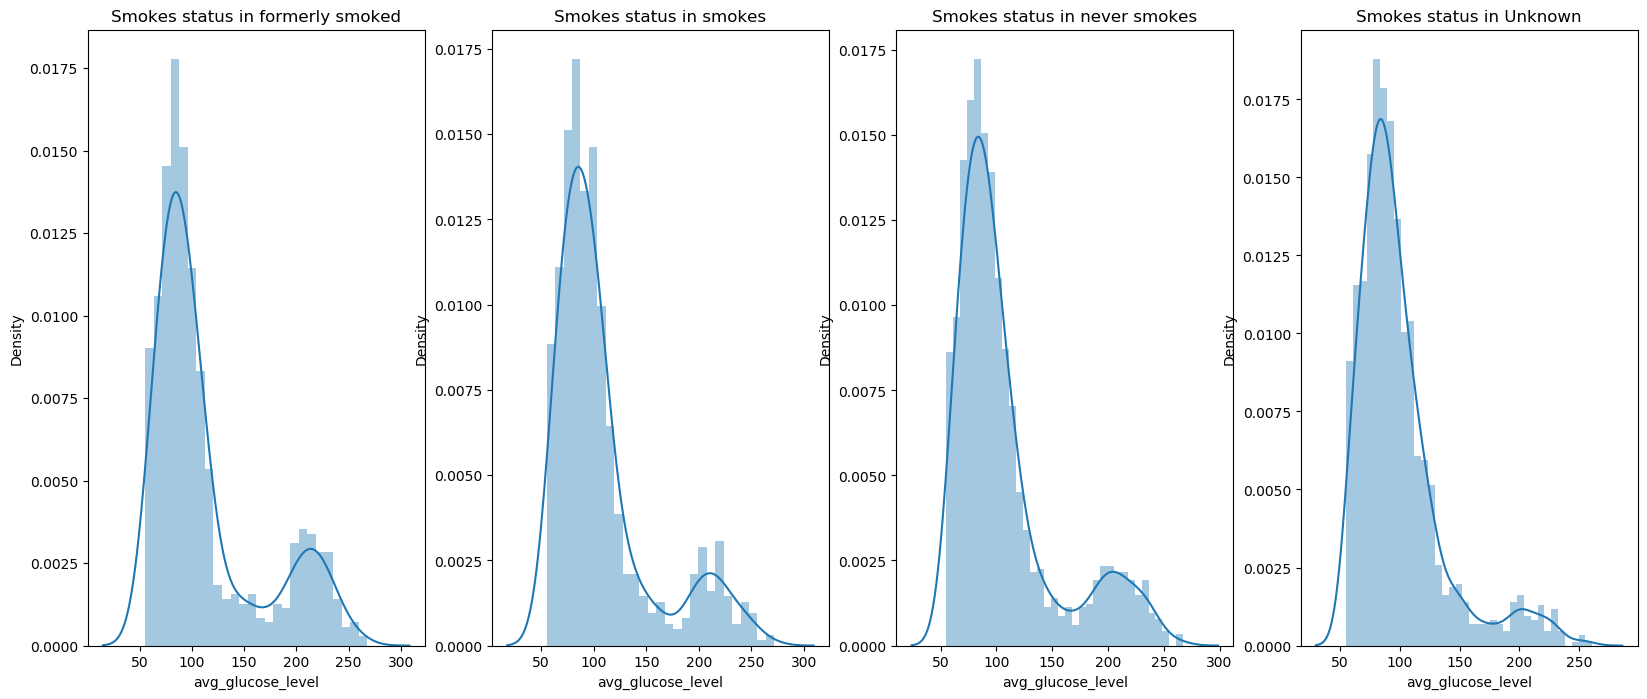

In [48]:
f,ax=plt.subplots(1,4,figsize=(20,8))
sns.distplot(df[df['smoking_status']=="formerly smoked"].avg_glucose_level,ax=ax[0])
ax[0].set_title('Smokes status in formerly smoked')
sns.distplot(df[df['smoking_status']=="smokes"].avg_glucose_level,ax=ax[1])
ax[1].set_title('Smokes status in smokes')
sns.distplot(df[df['smoking_status']== "never smoked"].avg_glucose_level,ax=ax[2])
ax[2].set_title('Smokes status in never smokes')
sns.distplot(df[df['smoking_status']== "Unknown"].avg_glucose_level,ax=ax[3])
ax[3].set_title('Smokes status in Unknown')
plt.show()

In [50]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


In [ ]:
#It seems BMI is not related much with the label but we can still keep you may drop that column as we did before.